# Machine Learning Engineer Nanodegree

## Model Evaluation & Validation

## Project: Predicting BostonHousing Prices

### Table of Contents

* [Introduction](#intro)
	* [Getting Started](#Getting-Started)
	* [Data Exploration](#Data-Exploration)
		* [Implementation: Calculate Statistics](#Implementation:-Calculate-Statistics)
		* [Question 1 - Feature Observation](#Question-1---Feature-Observation)
	* [Developing a Model](#Developing-a-Model)
		* [Implementation: Define a Performance Metric](#Implementation:-Define-a-Performance-Metric)
		* [Question 2 - Goodness of Fit](#Question-2---Goodness-of-Fit)
		* [Implementation: Shuffle and Split Data](#Implementation:-Shuffle-and-Split-Data)
		* [Question 3 - Training and Testing](#Question-3---Training-and-Testing)
	* [Analyzing Model Performance](#Analyzing-Model-Performance)
		* [Learning Curves](#Learning-Curves)
		* [Question 4 - Learning the Data](#Question-4---Learning-the-Data)
		* [Complexity Curves](#Complexity-Curves)
		* [Question 5 - Bias-Variance Tradeoff](#Question-5---Bias-Variance-Tradeoff)
		* [Question 6 - Best-Guess Optimal Model](#Question-6---Best-Guess-Optimal-Model)
	* [Evaluating Model Performance](#Evaluating-Model-Performance)
		* [Question 7 - Grid Search](#Question-7---Grid-Search)
		* [Question 8 - Cross-Validation](#Question-8---Cross-Validation)
		* [Implementation: Fitting a Model](#Implementation:-Fitting-a-Model)
		* [Making Predictions](#Making-Predictions)
		* [Question 9 - Optimal Model](#Question-9---Optimal-Model)
		* [Question 10 - Predicting Selling Prices](#Question-10---Predicting-Selling-Prices)
		* [Sensitivity](#Sensitivity)
		* [Question 11 - Applicability](#Question-11---Applicability)

<a id = 'intro'></a>

## Introduction

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

**Note:** This notebook came predesigned with the syntax structure of Python 2.7. It is to be noted that the Machine Learning Foundation course that I'm enrolled in follows Python 3.x throughout its sections. Python 3.x is now the standard version of the language, its predecessor now being officially retired. All major Python solutions like Anaconda and Entropy now provide Python 3.6 as the standard.

Since that is the case, and the newer version being more in use than its predecessor, I've therefore made the appropirate changes to the syntaxes wherever required. Also to be noted is that some of the modules such as `cross_validation` and `learning_curve` that this template notebook already used have now been deprecated and been replaced by a single `model_selection` module for `sklearn`. Since that requires to make additional changes in this template as well as `visuals.py` file, wherever necessary and without errors, I've replaced the modules with the newer ones while also ensuring that wherever errors are received, the notebook uses the old modules (these will be removed in `sklearn 0.20`).

And hence, with this notebook is also included the updated `visuals` that contain only minor changes with most of the stuff being left untouched (consider this a small patch). It is therefore requested that the reviewer use the updated `visuals` with this note book that is being included in the repository.

## Getting Started

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [17]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

# Note: This notebook uses Python 3.6x instead of Python 2.7 that came preloaded
# in the template. Since the latest version is the standard version and is used
# throughout the MLF nanodegree course, I've thus made changes to syntaxes wherever
# required. Please see 'Note' above.

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [18]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation

As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer:** These factors should have differing affects on the median prices for each of the observations; however, aggregating them will provide the researcher mixed results.

- The factor `RM` will certainly be having a linear relationship with the `MEDV` variable. Intuitions says that higher the number of rooms per home, the higher will be its monetary value and vice versa.
- On the contrary, `LSTAT` will have an inverse relationship. Since a locality consisting more of the lower classes will have lower standards of living and additional factors such as hygience and cleanliness will be lower; the overall monetary value is bound to decrease.
- The `PTRATIO` represents number of students per teacher. If there are more students per teacher, then that indicates a lack of educational infrastructure in the locality. On the contrary, it is always a good thing to have a balanced student-to-teacher ratio. This should be a linear predictor; the more teachers available, better are the neighbourhood's educational vistas, and hence this will ultimately increase the property prices of the locality in general.

And hence, only the `LSTAT` variable should be behaving as a negative factor, speaking through pure intuition.

## Developing a Model

In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [19]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    from sklearn.metrics import r2_score
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [20]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** In statistics, the R<sup>2</sup> value occupies a very influential space. This is because it is one of the most basic and also one of the earliest measures for explaining how well the cause-and-effect relationship between a dependent variable and its predictor(s) is. It is is the central measure in correlation analysis and an indispensable measure in regression analysis as well.

Most commonly called as _coefficient of determination_, this value is the ratio of residual sum of squares and the total sum of squares in any analysis, subtracted by 1. That is, $R^2 = 1- \frac{S.S_{res}}{S.S_{tot}}$, where $S.S_{res}$ relates to residual sum of squares and $S.S_{tot}$ relates to total sum of squares. The sum of squares is obtained by squaring the sum of all the subtractions between the observed mean of the predicted variable as well as subtractions with every predictor with its predicted point. Here, $S.S_{res} = \sum(y_i - \bar{y})^2$, where $y_i$ corresponds to individual predicted/dependent observation and $\bar{y}$ is average of the predicted. Similarly, $S.S_{tot}$ is the total sum of squares, where this is explained as $\sum(x_i - y_i)^2$.

The $R^2$ value usually takes an integer between 0 and 1. However, in cases where the relationship between variables could be established as negative, this number goes into negatives as well. While 0 indicates no relationship between variables, 1 indicates 100% explanations (perfect fit) between the predictor and predicted. Likewise, a -1 will indicate a 100% negative explanation.

In stating what the $R^2$ means in a descriptive sense, then it should be interpreted in percentages. The $R^2$ we have above is 0.923, which indicates a 92.3% explanation between the `True value` and `Predicted` for the small table we had above. That is an almost perfect fit and a model like that should well be considered for making future predictions

### Implementation: Shuffle and Split Data

Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
# TODO: Import 'train_test_split'

# Note: This module is now under model_selection
# and not cross_validation which is depprecated

from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, train_size = 0.80,
                                                    random_state = 1000)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:** Splitting the data into training and testing sets is rule no. 1 in every predictive algorithm that is carried out. There are several reasons why this principle needs to be followed:

1. Carrying out an algorithm on a very large dataset is a computationally intensive practice and has to be done in 'batches'. Splitting the data is one of the many forms of reducing the data size so as to make it more computationally applicable while also maintaining the core characteristics of the original dataset.

2. One of the main reasons behind splitting datasets is that it allows an algorithm to 'learn' from **unseen data**. This unseen data is represented by the testing set. By not allowing the data to be split into training and testing sets, the researcher is simply running the algorithm to see how it works and not how it is performing. An algorithm needs to both work as well as perform (on unseen data) and hence splitting becomes essential.

3. Training and testing sets provide the researcher with the option of fine-tuning and optimizing model performance. In a single, unsplit dataset, optimizing the model will become extremely slow and tedious because the model needs to be run on the whole thing a number of times. Even then, there will always remain the problem of incomplete optimization. For that the training set is formed with the purpose of actually testing out the model's results so that people know where it requires finetuning. After that, the model is run on the testing set which simulates real-world data to monitor its performance and then execute further optimizations. Data splitting thus offers flexibility on making the model better every time.

4. A focus on data terra incognita. Machine learning is all about making the best predictions on untrained/unseen data and hence a testing set becomes the lifeline for that model to actually work and survive. As noted above, running a model on a single dataset is simply like running a regression model and reporting on the results like we've done in academic topics. How well will it be performing on new, unseen data will always remain an unfinished thing in such a case. And hence, splitting the data becomes the logical step to execute for an algorithm to learn.

## Analyzing Model Performance

In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

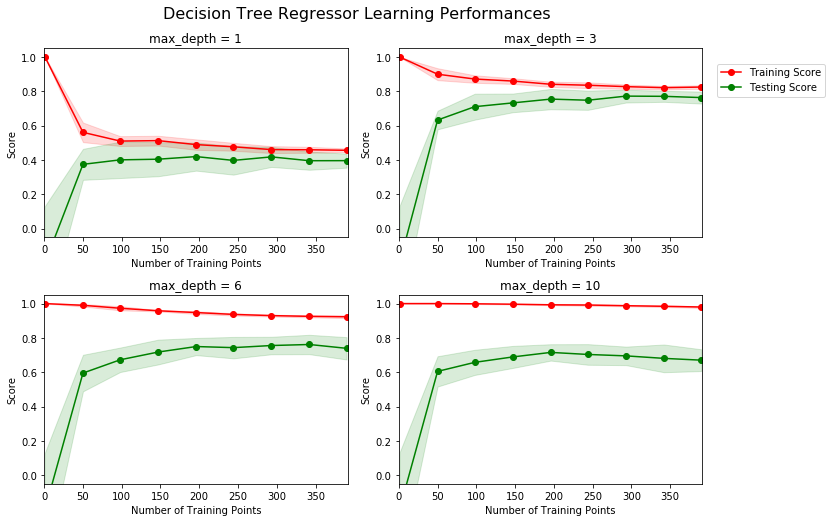

In [22]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data

* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:** Measuring the performance of a model through the performance curves is like selecting the most appropriate engine oil for an automobile. While there are several engine oils in the market, only a select few qualify to be usable with every engine type. Within those qualified lubricants, there are those that perform better but are usually not instructed by the manufacturers and the rest are the ones deemed suitable and are officially recommended. In selecting predictive algorithms, a similar approach prevails. Users have several choices but only a few qualify as the most appropriate.

In general, there are at least two conditions for the performance curves to meet for a model to be qualified. A higher training score and a minimal difference between training and testing scores. A high training score indicates that the model should be workable with the testing data. However, there are flaws in deep models that sometimes prevent them to work with testing sets with similar results. With a `max_depth` of 10, the model above has the highest training scores among all the remaining ones but suffers decisively in the testing set and has a wide gap between the two lines. Maximum depth can be thought of similar to the degree the user specifies in a theoretical model. So, while a depth of 3 can be thought of as a cubic model, a depth of 10 will be a deca model. Models of degree 10 are rarely used, most of them being topics under high level mathematics and in such cases where analysts are of the opinion that such models work fine. But those require different data types. In these cases, they provide excellent accuracies. Unfortunately, data memorizing is a serious problem with them and in most cases is the reason behind high variances in the testing phase.

Adding more points will not benefit the model much since there comes a time where both training and testing scores flatten off and run parallel to each other. They might eventually converge but that will be at almost infinity and would require an unconventional computational ability.

### Complexity Curves

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

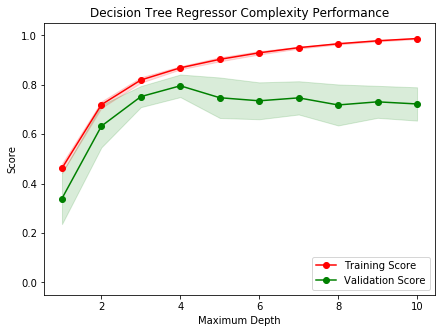

In [23]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff

* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:** There are two cases here that need to be stated taking confidence the model complexity graph and the learning performance graphs.

- Generally speaking, as the depth of a model increases, its space between training and testing scores increase. That is, higher the depth of the model, higher is its variance and hence greater the degree of overfitting. On the contrary, interpreting the two graphs above tells us that a depth of 1 has low bias as well as variance but has low training and testing scores as well.

- At a depth of 10, the model enjoys a very high training score but suffers from a large variance that suggests overfitting.

In selecting the best suitable model, three criteria need to be met: the training score, difference between training and testing scores and the incidence of bias and variance. While the training score should remain high, the remaining conditions should have a lower scale. From this logic, a model that is cubic or quadratic should fit the best for most of the data.

### Question 6 - Best-Guess Optimal Model

* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:** A depth of 3 as seen from the complexity curve seems to fit the best. A quadratic model too should work well but that might suffer from minor variance problems. A model of depth 1 has the lowest bias but again suffers from low training scores. For the data we have here, a 3rd degree depth is the best.

## Evaluating Model Performance

In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search

* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:** The grid search technique is a way of selecting the best model within a 'grid of models' and selecting the one that shows the best performance. For example, one can have a training set of several variables or features, and being unsure which model to specifically use, a beginner researcher can use several models in a grid, run those models for both training and testing and selecting the one he/she considers the best. Its like a trial-and-error approach towards machine learning algorithm selection.

A grid search technique is one of the most basic techniques of algorithm selection and be used anytime by any researcher (beginner, intermediate or advanced) to select the best suited models among a list of many. The biggest advantage of this technique is that although its of the most basic nature, it can be used in a situation where its required to have the task done quickly. It is also not the most technical and hence is a good starting point for beginners.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:** In algorithm design and implementation, there are several methods by which analysts split the data into training and testing sets. As is common knowledge now, a predictive model needs to be 'learn' from a training data and has to be then implemented in the testing dataset for the analysts to monitor its real performance on independent and almost unbiased data. 

One of the methods that is used is the cross-validation method. This is one of the most widely used methods because of its simple implementation and deliverance of accurate results in almost any type of data. In cross validation, the data is simply split into several sets that have already been stated as training and testing sets. So in one sense, cross validation is used almost everytime a model needs to be implemented because the first rule of predictive analytics is that data needs to be split into several parts. So, cross validation is an essential step. The k-fold cross validation can be thought of as an extension to its parent CV technique in that the researcher divides the data into _k_ equal parts where _k_ signifies some numeral. This is usually taken till 10 but there is no limit to it since every data requires a unique _k_ for a reasonable number of folds.

For example, `k=5` will result in the original data getting divided into 5 equal parts, wherein 1 of these parts will be kept as a validation or test set. So, k-fold cross validation involves _k-1_ number of training sets while the left out set is kept as a validation set. The table below will make this clearer.

| _Testing_  | Training | Training | Training | Training |
|----------|----------|----------|----------|----------|
| Training | _**Testing**_  | Training_ | Training | Training |
| Training | Training | _**Testing**_  | Training | Training |
| Training | Training | Training | _**Testing**_  | Training |
| Training | Training | Training | Training | _**Testing**_  |

This table is a $5\times5$ table, each having a testing set that is unique. In reality, 5 iterations of 5 equal parts are executed with each iteration having a test set that in an earlier iteration could have been used as a training set. In this manner, training scores are acquired and the average of testing scores are calculated to find out the accuracy of a model. This has several advantages, the most notable being that this method provides the researcher with accurate results that are accepted industry wide.

The k-fold CV can be used with the grid search technique. While this method will provide several tests for training and validation, the grid search technique can then be used as an excellent alternative to match the most suitable model with this data.

### Implementation: Fitting a Model

Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [24]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import make_scorer as ms
from sklearn.grid_search import GridSearchCV as gscv

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = dtr(random_state = 1000)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5,
                           6, 7, 8, 9 ,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = ms(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = gscv(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [25]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer:** Since our model and all its machines within are well designed, I therefore trust these results. Looking back to the complexity curve and comparing with the official statement in the preceding cell, a depth of 4 does seem to be optimal for the data we have. More than that will lead to incremental increases in variance with each increasing depth while going lower will simply make the model too simple and lead to biases.

### Question 10 - Predicting Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [26]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $405,037.50
Predicted selling price for Client 2's home: $237,505.88
Predicted selling price for Client 3's home: $941,500.00


**Answer:** These are nice results. But are they comparable with some of the statistics we found out in the beginning of this document? Let's call some of them for our features data.

In [27]:
# Call features again

features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


We can compare these results shown above with the actual ones provided by the model. For example, the average number of rooms still comes out to be 6. The data collected by the real estate agent puts the first client's price to be the most reasonable with having the best of everything. With a predicted price of $405,037, this home will be having 5 rooms. Very close to the population average putting this at a very close margin. Moving further, we have the `LSTAT` values; while the data collected by the agent puts this at a 17% poverty in the neighbourhood, this figure comes under the 75th quantile in our `feature` data while the average overall is approx. 13. This can be tested out through hypothesis teting that whether the data collected by the agent is significantly different from the average value we have above. For now, since its within the range of 75% data, we can be sure that a 17% poverty is still within means of a reasonable home.

Similarly, we have the `PTRATIO` of 18.5 for the table above while the agent's data suggests a ratio of 15-to-1. Still comes within the limits of acceptability and close to the statistic above. Finally, coming to the predicted price for client 1 and we have this figure at \$405,037. How close is this with the averaged median value? Scrolling back to the beginning of the document, we had this value at \$454.392. It might be helpful to refer to the range of these predictions through the cell provided right below that puts this at \$69,044.61. Since a difference of \$49,305 keeps our predicted price within range, we can hence state that this is an acceptable prediction. However, I still feel that the difference could have been smaller putting our prediction to be even more acceptable with agents being more confident in this model. But its still a good model and predicted the right reasonable price.

For the remaining clients, the model again seems to be predicting with nice accuracies.

### Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [28]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:** As **Sensitivity** above described, an optimal model is not necessarily a robust model. Besides, a robust model should not necessarily be an optimal model for every similar data.

In a similar fashion, we cannot suggest this model for deciding every real estate price. There are of course several reasons for that. For example, its true that this model does contain very few features to act realistically on any home price of the world. Deciding real estate factors involves much more than number of rooms, conditions of the neighbourhood, etc. In efficient algorithms, one will find a number of factors that are 'designed' (also called as feature designing) to make the models more accurate and logical.

In this model however, since its purpose is for only practicing or experimental algorithmic representation, it cannot hence be used in a more diverse data. Originally, the `boston_housing` data has approx. 18 features instead of just 3 as shown here. Hence, this model requires more feature expansion for a more comprehensive purpose.

As far as robustness is concerned, yes, the model is robust enough to at least work consistently with this and similar other data. The reasons are simple; since there are not many features as predictors, and provided the already well planned structure that we've designed the model so far, the results we received have been fairly accurate.

Neighbourhood and local conditions are an important factor in real estate and home pricing. Customers and investors rarely face a situation where they are not interested in the conditions of a locality such as hygiene and cleanliness, access to infrastructural facilities, airports, hospitals, water and sports facilities, etc. Characteristics of a neighbourhood are therefore an important variable, if not the most important.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'boston_housing.ipynb'])

0